In [1]:
"""
GravMag: Calculate the gravity gradient tensor invariants
"""
import numpy as np
# 3rd imports
import matplotlib.pyplot as plt
# local imports
from geoist import gridder
from geoist.inversion.geometry import Prism
from geoist.pfm import prism, tensor
from geoist.vis import giplt




In [2]:
#直立长方体模型设置
area = [-5000, 5000, -5000, 5000]
model = [Prism(-3000, 3000, -1000, 1000, 0, 1000, {'density': 1000})]
#观测数据设置
shape = (100, 100)
xp, yp, zp = gridder.regular(area, shape, z=-500)


In [3]:
#计算重力梯度张量
data = [prism.gxx(xp, yp, zp, model),
        prism.gxy(xp, yp, zp, model),
        prism.gxz(xp, yp, zp, model),
        prism.gyy(xp, yp, zp, model),
        prism.gyz(xp, yp, zp, model),
        prism.gzz(xp, yp, zp, model)]


In [4]:
# 计算重力梯度张量不变量（3个）
invariants = tensor.invariants(data)
data = data + invariants

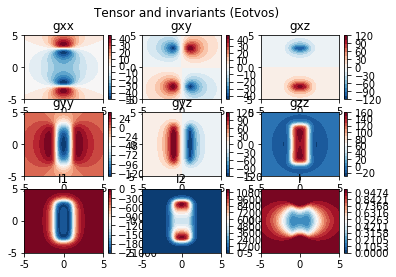

In [5]:
# 画图
plt.figure()
plt.axis('scaled')
plt.suptitle("Tensor and invariants (Eotvos)")
titles = ['gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'I1', 'I2', 'I']
for i in range(len(data)):
    plt.subplot(3, 3, i + 1)
    plt.title(titles[i])
    levels = 20
    if i == 8:
        levels = np.linspace(0, 1, levels)
    giplt.contourf(yp, xp, data[i], shape, levels, cmap=plt.cm.RdBu_r)
    plt.colorbar()
    giplt.m2km()
plt.show()